# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import os
os.getcwd()

import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob('./data/lfw/*/*'))
dog_files = np.array(glob('./data/dog_images/*/*/*'))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


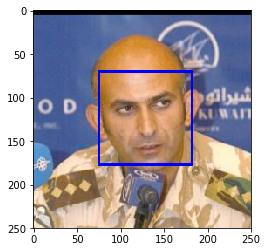

In [2]:
import cv2              
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [22]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

In [37]:
faces_detected = []
for image in human_files:
    if face_detector(image) == True:
        faces_detected.append(image)
print(len(faces_detected) / len(human_files),
      '- proportion of humans detected in human_files.')

faces_detected = []
for image in dog_files:
    if face_detector(image) == True:
        faces_detected.append(image)
print(len(faces_detected) / len(dog_files),
     '- proportion of humans detected in dog_files.')

0.9871533287992141 - proportion of humans detected in human_files.
0.10968746257933182 - proportion of humans detected in dog_files.


__Answer:__
99% (0.987153) of human faces were detected in the human data set, and 11% (0.109687) of human faces were detected in the dog data set. 

In [16]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#
## TODO: Test the performance of the face_detector algorithm
## on the images in human_files_short and dog_files_short.

In [17]:
for image in tqdm(human_files_short):
    face_detector(image)

100%|██████████| 100/100 [00:01<00:00, 60.99it/s]


In [18]:
for image in tqdm(dog_files_short):
    face_detector(image)

100%|██████████| 100/100 [00:04<00:00, 23.50it/s]


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [19]:
### (Optional)
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [23]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [24]:
from PIL import Image
import torchvision.transforms as transforms

def load_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    in_transform = transforms.Compose([
        transforms.Resize(size=(244, 244)),
        transforms.ToTensor()])

    # discard the transparent, alpha channel (in Style_Transfer_Exercise.ipynb)
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return(image)

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    '''
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = VGG16(img)
    return torch.max(ret,1)[1].item()

In [22]:
VGG16_predict(dog_files[0])

268

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [25]:
### returns "True" if a dog is detected in the image stored at img_path
## TODO: Complete the function.
def dog_detector(img_path):
    res = VGG16_predict(img_path)
    if (res < 151) or (res > 268):
        is_dog = False
    else:
        is_dog = True
    return is_dog # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

In [30]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
faces_detected = []
for image in human_files_short:
    if dog_detector(image) == True:
        faces_detected.append(image)
print(len(faces_detected) / len(human_files_short),
       '- proportion of dogs detected in human_files_short.')

faces_detected = []
for image in dog_files_short:
    if dog_detector(image) == True:
        faces_detected.append(image)
print(len(faces_detected) / len(dog_files_short),
      '- proportion of dogs detected in dog_files_short')

0.0 - proportion of dogs detected in human_files_short.
0.95 - proportion of dogs detected in dog_files_short


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [16]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [84]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import os
import re
from glob import glob
import os
import torch
from torchvision import transforms, datasets
from PIL import ImageFile
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
use_cuda = torch.cuda.is_available()
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [140]:
# define training and test data directories
data_dir = './data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
valid_dir = os.path.join(data_dir, 'valid/')
test_dir = os.path.join(data_dir, 'test/')

# Examining dog breeds (classes)
classes_idx = sorted(os.listdir(train_dir))
classes = []
for i in classes_idx:
    classes.append(i.split('.')[1])
classes = sorted(classes)

print('Number of dog breeds: ', len(classes))

data_transform = transforms.Compose([
    transforms.Resize(size=(128, 128)),
    transforms.RandomRotation(10),
    transforms.ToTensor()
    transforms.Normalize((0.4683, 0.4477, 0.3813), (0.2054,  0.2008, 0.1947))
    ]) # get normalization values in next cell

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(test_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validate images: ', len(valid_data))
print('Num test images: ', len(test_data))

# define dataloader parameters
batch_size = 20
num_workers = 1

# prepare data loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(
    valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders = {'train':train_loader, 'valid':valid_loader, 'test':test_loader}

Number of dog breeds:  133
Num training images:  6680
Num validate images:  836
Num test images:  836


In [155]:
# Get mean and standard deviation for transforms.Normalize()
def get_mean_std(data_loader):
    mean_batch = 0.
    std_batch = 0.
    nb_samples = 0.
    
    for data in data_loader:
        data1 = data[0]
        batch_samples = data1.size(0)
        data = data1.view(batch_samples, data1.size(1), -1)
        mean_batch += data1.mean(2).sum(0)
        std_batch += data1.std(2).sum(0)
        nb_samples += batch_samples
    mean_batch /= nb_samples
    std_batch /= nb_samples

    mean_final = []
    std_final = []
    
    for idx, channel in enumerate(zip(mean_batch, std_batch)):
        mean_final.append(mean_batch[idx].mean())
        std_final.append(std_batch[idx].mean())
        mean_batch
    print(mean_final, std_final)
    return (mean_final, std_final)

mean_std = get_mean_std(train_loader)

[tensor(0.4682), tensor(0.4477), tensor(0.3813)] [tensor(0.2054), tensor(0.2008), tensor(0.1947)]


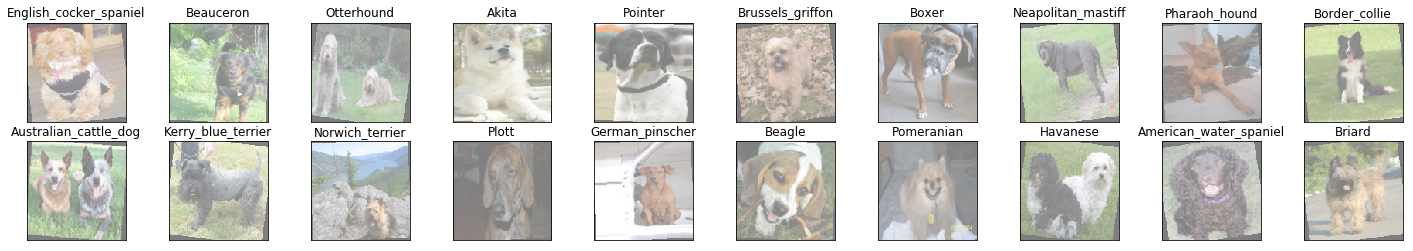

In [14]:
# Visualize sample data
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])

In [10]:
plt.show()

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: 
I resized my images to 128x128. I did this to increase the speed of training. I also decided to leave out any cropping, simply because the dog's faces are a key feature in detecting their breed, and they don't always fall into a predictable position in each image. Moreover, using center cropping and random cropping would potentially leave out this key feature and hinder accuracy. As for augumentation, I did decide to use random rotations, but not flips or translations.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [5]:
# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        # nn.Conv2d(in_channels, out_channels, kernal_size)
        # note: maxpool halves x-y dims for each conv layer
        
        # in 128x128x3 tensor
        self.conv1 = nn.Conv2d(3, 128, 3, padding=1)
        # in 64x64x128 tensor
        self.conv2 = nn.Conv2d(128, 256, 3, padding=1)
        # in 32x32x256 tensor
        self.conv3 = nn.Conv2d(256, 512, 3, padding=1)
        # in 16x16x512 tensor - input to 1st linear layer
        self.conv4 = nn.Conv2d(512, 768, 3, padding=1)
        # out 8x8x728 - input to 1st linear layer
        
        # MaxPool2d(2,2) reduces x-y dims by 1/2
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(8 * 8 * 768, 500)
        self.fc2 = nn.Linear(500, 133)
        self.dropout = nn.Dropout(0.25)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        # flatten tensor
        x = x.view(-1, 8 * 8 * 768)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#
# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch = nn.DataParallel(model_scratch.cuda())

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step. 

__Answer:__ 
The architecture is fairly straightforward: for every convolutional layer, the x-y dimensions are halved in a pooling layer, but there is a two-fold increase in depth, except for the last convolutional layer, where the depth increases by 50%. I had originally tried to go with a 100% increase in depth for the last layer, but this increased compute time too much.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [6]:
### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.1)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [2]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        # train the model
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output = model(data)
    
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
        
        # validate the model       
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, train_loss, valid_loss))

        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min, valid_loss))
        torch.save(model.state_dict(), 'model_scratch.pt')
        valid_loss_min = valid_loss

    # return trained model
    return model

In [8]:
# train the model
model_scratch = train(50, loaders, model_scratch, optimizer_scratch,
    criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 32623.837414 	Validation Loss: 4063.922390
Validation loss decreased (inf --> 4063.922390).  Saving model ...
Epoch: 2 	Training Loss: 32465.477180 	Validation Loss: 4053.543295
Validation loss decreased (4063.922390 --> 4053.543295).  Saving model ...
Epoch: 3 	Training Loss: 31595.987406 	Validation Loss: 3831.874918
Validation loss decreased (4053.543295 --> 3831.874918).  Saving model ...
Epoch: 4 	Training Loss: 30429.646010 	Validation Loss: 3745.258366
Validation loss decreased (3831.874918 --> 3745.258366).  Saving model ...
Epoch: 5 	Training Loss: 29278.453102 	Validation Loss: 3565.191098
Validation loss decreased (3745.258366 --> 3565.191098).  Saving model ...
Epoch: 6 	Training Loss: 28233.945589 	Validation Loss: 3493.158308
Validation loss decreased (3565.191098 --> 3493.158308).  Saving model ...
Epoch: 7 	Training Loss: 27257.006421 	Validation Loss: 3406.975397
Validation loss decreased (3493.158308 --> 3406.975397).  Saving model ...
Epoch: 

KeyboardInterrupt: 

In [9]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [10]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass
        output = model(data)
        # calculate loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders, model_scratch, criterion_scratch, use_cuda)

Test Loss: 4.316167


Test Accuracy: 13% (109/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [5]:
## TODO: Specify data loaders
## Specify appropriate transforms, and batch_sizes
import os
import re
from glob import glob
from PIL import ImageFile
from PIL import Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
import torch
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

In [6]:
# define training and test data directories
data_dir = './data/dog_images/'
train_dir = os.path.join(data_dir, 'train/')
test_dir = os.path.join(data_dir, 'test/')
valid_dir = os.path.join(data_dir, 'valid/')

# Examining dog breeds (classes)
classes_idx = sorted(os.listdir(train_dir))
classes = []
for i in classes_idx:
    classes.append(i.split('.')[1])
classes = sorted(classes)

data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
valid_data = datasets.ImageFolder(test_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validate images: ', len(valid_data))
print('Num test images: ', len(test_data))

# define dataloader parameters
batch_size = 20
num_workers = 1

# prepare data loaders
train_loader = torch.utils.data.DataLoader(
    train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
valid_loader = torch.utils.data.DataLoader(
    valid_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

loaders = {'train':train_loader, 'valid':valid_loader, 'test':test_loader}

Num training images:  6680
Num validate images:  836
Num test images:  836


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [7]:
use_cuda = torch.cuda.is_available()

## TODO: Specify model architecture 
model_transfer = models.vgg16(pretrained=True)

print(model_transfer.classifier[6].in_features) 
print(model_transfer.classifier[6].out_features)

for param in model_transfer.features.parameters():
    param.requires_grad = False

n_inputs = model_transfer.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model_transfer.classifier[6] = last_layer

if use_cuda:
    model_transfer = nn.DataParallel(model_transfer.cuda())

4096
1000


In [8]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        # train the model
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # update training loss
            train_loss += loss.item()*data.size(0)
        
        # validate the model       
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the batch loss
            loss = criterion(output, target)
            # update average validation loss 
            valid_loss += loss.item()*data.size(0)

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, train_loss, valid_loss))

        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                valid_loss_min, valid_loss))
        torch.save(model.state_dict(), 'model_scratch.pt')
        valid_loss_min = valid_loss

    # return trained model
    return model

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
I used vgg16 for the transfer learning portion of this project without any changes to the architecture. The model performed well and was able to reach 91% accuracy in the testing section. vgg16 is a suitable architecture for this project because dog breeds were included in it's original training set.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [9]:
### TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_transfer = optim.SGD(model_transfer.parameters(), lr=0.01)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [10]:
# Define train function from scratch model
model_transfer = train(50, loaders, model_transfer,
    optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

Epoch: 1 	Training Loss: 9727.302043 	Validation Loss: 583.060185
Validation loss decreased (inf --> 583.060185).  Saving model ...
Epoch: 2 	Training Loss: 3749.193645 	Validation Loss: 497.430474
Validation loss decreased (583.060185 --> 497.430474).  Saving model ...
Epoch: 3 	Training Loss: 2457.369390 	Validation Loss: 473.396913
Validation loss decreased (497.430474 --> 473.396913).  Saving model ...
Epoch: 4 	Training Loss: 1601.822010 	Validation Loss: 448.429526
Validation loss decreased (473.396913 --> 448.429526).  Saving model ...
Epoch: 5 	Training Loss: 1187.839631 	Validation Loss: 446.422360
Validation loss decreased (448.429526 --> 446.422360).  Saving model ...
Epoch: 6 	Training Loss: 924.210796 	Validation Loss: 469.021715
Epoch: 7 	Training Loss: 646.900665 	Validation Loss: 461.973795
Validation loss decreased (469.021715 --> 461.973795).  Saving model ...
Epoch: 8 	Training Loss: 602.706334 	Validation Loss: 478.593903
Epoch: 9 	Training Loss: 476.995681 	Validat

Traceback (most recent call last):
  File "/home/ddiaz/anaconda3/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/home/ddiaz/anaconda3/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/ddiaz/anaconda3/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/ddiaz/anaconda3/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

In [11]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [12]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass
        output = model(data)
        # calculate loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
       
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [13]:
# call test function    
test(loaders, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.243060


Test Accuracy: 91% (767/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [14]:
img_path = glob(test_dir + '*/*')

def load_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    in_transform = transforms.Compose([
        transforms.Resize(size=(244, 244)),
        transforms.ToTensor()])

    # discard the transparent, alpha channel (in Style_Transfer_Exercise.ipynb)
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return(image)

def transfer_predict(img_path):
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = model_transfer(img)
    return torch.max(ret,1)[1].item()

idx = transfer_predict(img_path[123])
print('Test image path:', img_path[123])
print('Predicted Breed:', classes[idx].replace("_"," "))

Test image path: ./data/dog_images/test/096.Labrador_retriever/Labrador_retriever_06470.jpg
Predicted Breed: Labrador retriever


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [15]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
## handle cases for a human face, dog, and neither
import matplotlib.image as mpimg

# dog breed predictor
def transfer_predict(img_path):
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = model_transfer(img)
    class_idx = torch.max(ret,1)[1].item()
    return classes[class_idx].replace("_"," ")

def run_app(image):
    if face_detector(image) == True:
        print("It's human being!")
        print("You resemble a", transfer_predict(image))
        img = mpimg.imread(image)
        imgplot = plt.imshow(img)
        plt.show()
    elif dog_detector(image) == True:
        print("It's a dog! It looks like a", transfer_predict(image))
        img = mpimg.imread(image)
        imgplot = plt.imshow(img)
        plt.show()
    else:
        print("Your subject doesn't resemble a dog or human.")

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The output for the scratch model did not work out so well, while the transfer learning model worked much better. Three possible improvements could include different augmentations, more convolutional layers, and batch normalization.

It's human being!
You resemble a Pointer


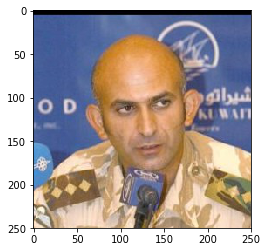

It's human being!
You resemble a Pointer


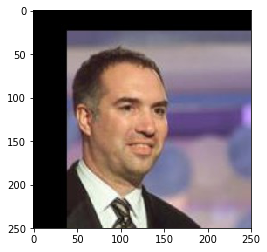

It's human being!
You resemble a Basset hound


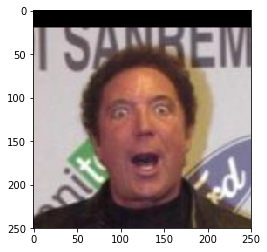

It's human being!
You resemble a Irish red and white setter


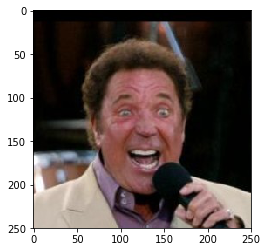

It's human being!
You resemble a Irish red and white setter


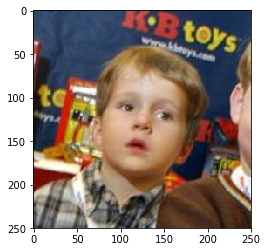

It's human being!
You resemble a Pointer


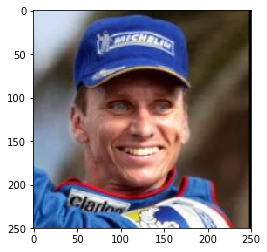

It's human being!
You resemble a Pointer


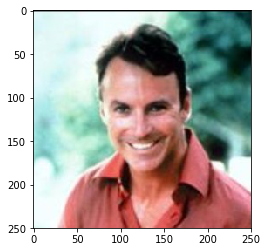

It's human being!
You resemble a Pointer


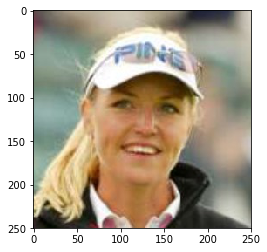

It's human being!
You resemble a Beagle


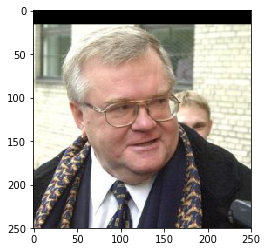

It's human being!
You resemble a Pointer


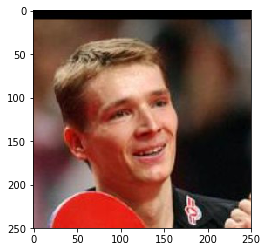

It's a dog! It looks like a Basset hound


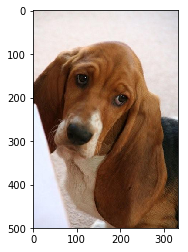

It's a dog! It looks like a Basset hound


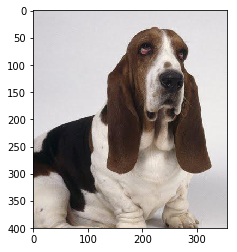

It's a dog! It looks like a Basset hound


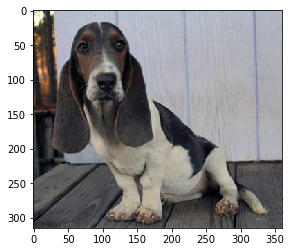

It's a dog! It looks like a Basset hound


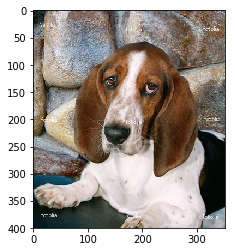

It's a dog! It looks like a Basset hound


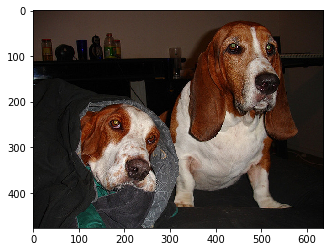

It's a dog! It looks like a Basset hound


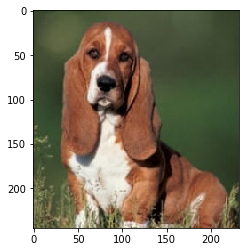

It's a dog! It looks like a Basset hound


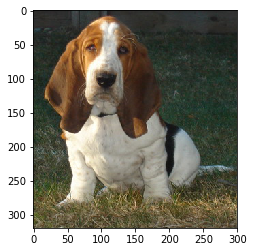

It's a dog! It looks like a Basset hound


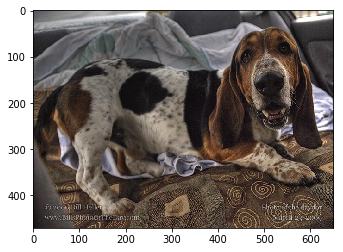

It's a dog! It looks like a Basset hound


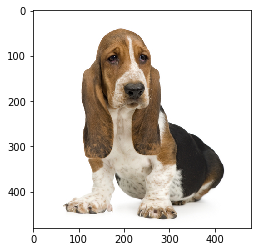

It's a dog! It looks like a Portuguese water dog


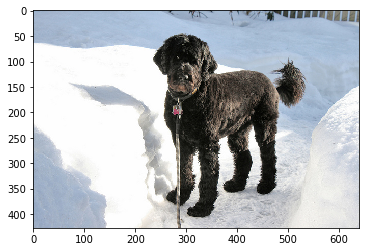

It's a dog! It looks like a Portuguese water dog


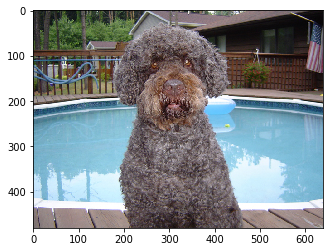

In [26]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:10], dog_files[54:65])):
    run_app(file)